In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./FloridaBikeRentals.csv', encoding='unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(ï¿½C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ï¿½C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# Check for null values and handle missing data
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(ï¿½C)              0
Humidity(%)                    0
Wind speed (m/s)               0
Visibility (10m)               0
Dew point temperature(ï¿½C)    0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

In [4]:
# Convert date to date format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract day, month, day-of-the week
df['DOW'] = df['Date'].dt.day_of_week
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Extract weekends, weekdays
df['IsWeekend'] = np.where(df['DOW'].apply(lambda d: (d == 6) | (d == 7)), 1, 0)

<Axes: >

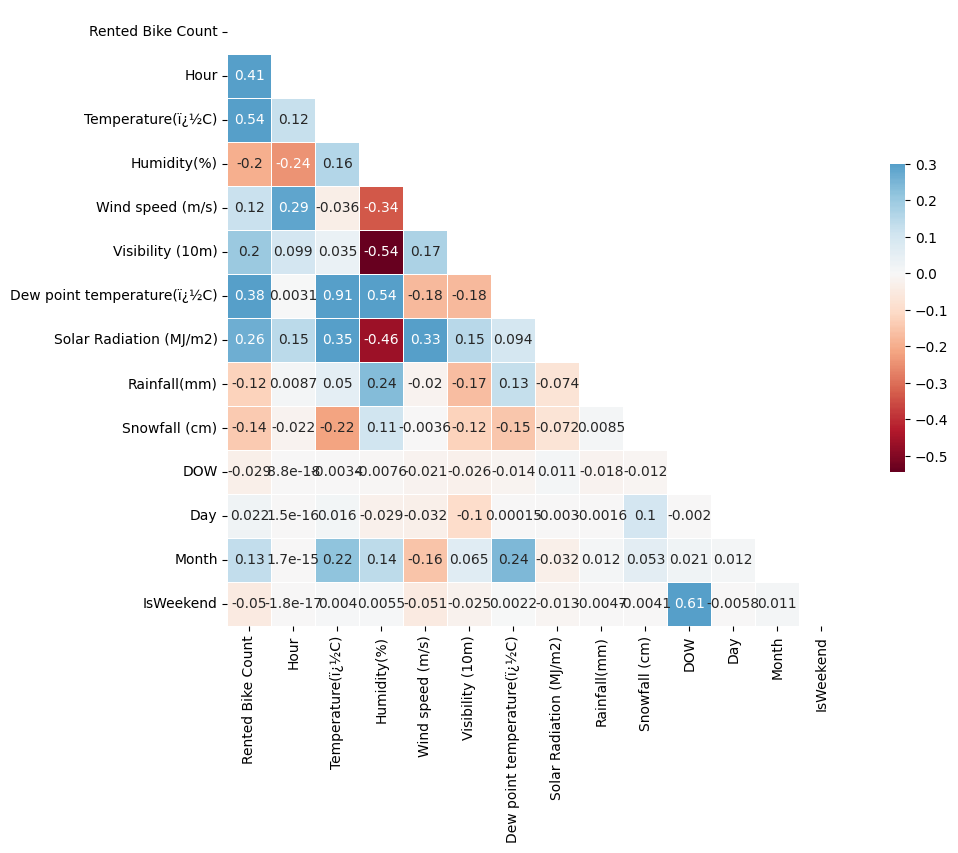

In [5]:
corr = df.corr(numeric_only=True)


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            , annot=True)



In [6]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(ï¿½C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ï¿½C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'DOW', 'Day', 'Month', 'IsWeekend'],
      dtype='object')

<Axes: ylabel='Frequency'>

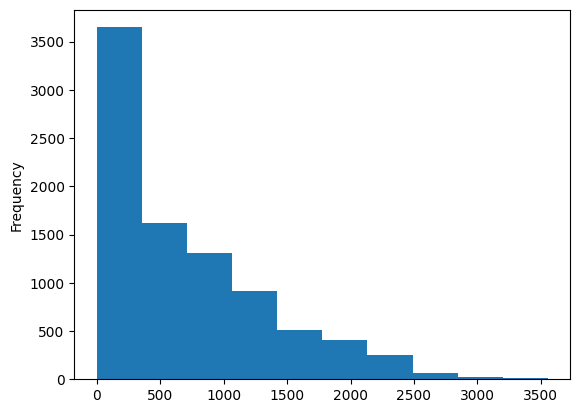

In [7]:
df['Rented Bike Count'].plot(kind='hist')

In [8]:
corr.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(ï¿½C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(ï¿½C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'DOW',
       'Day', 'Month', 'IsWeekend'],
      dtype='object')

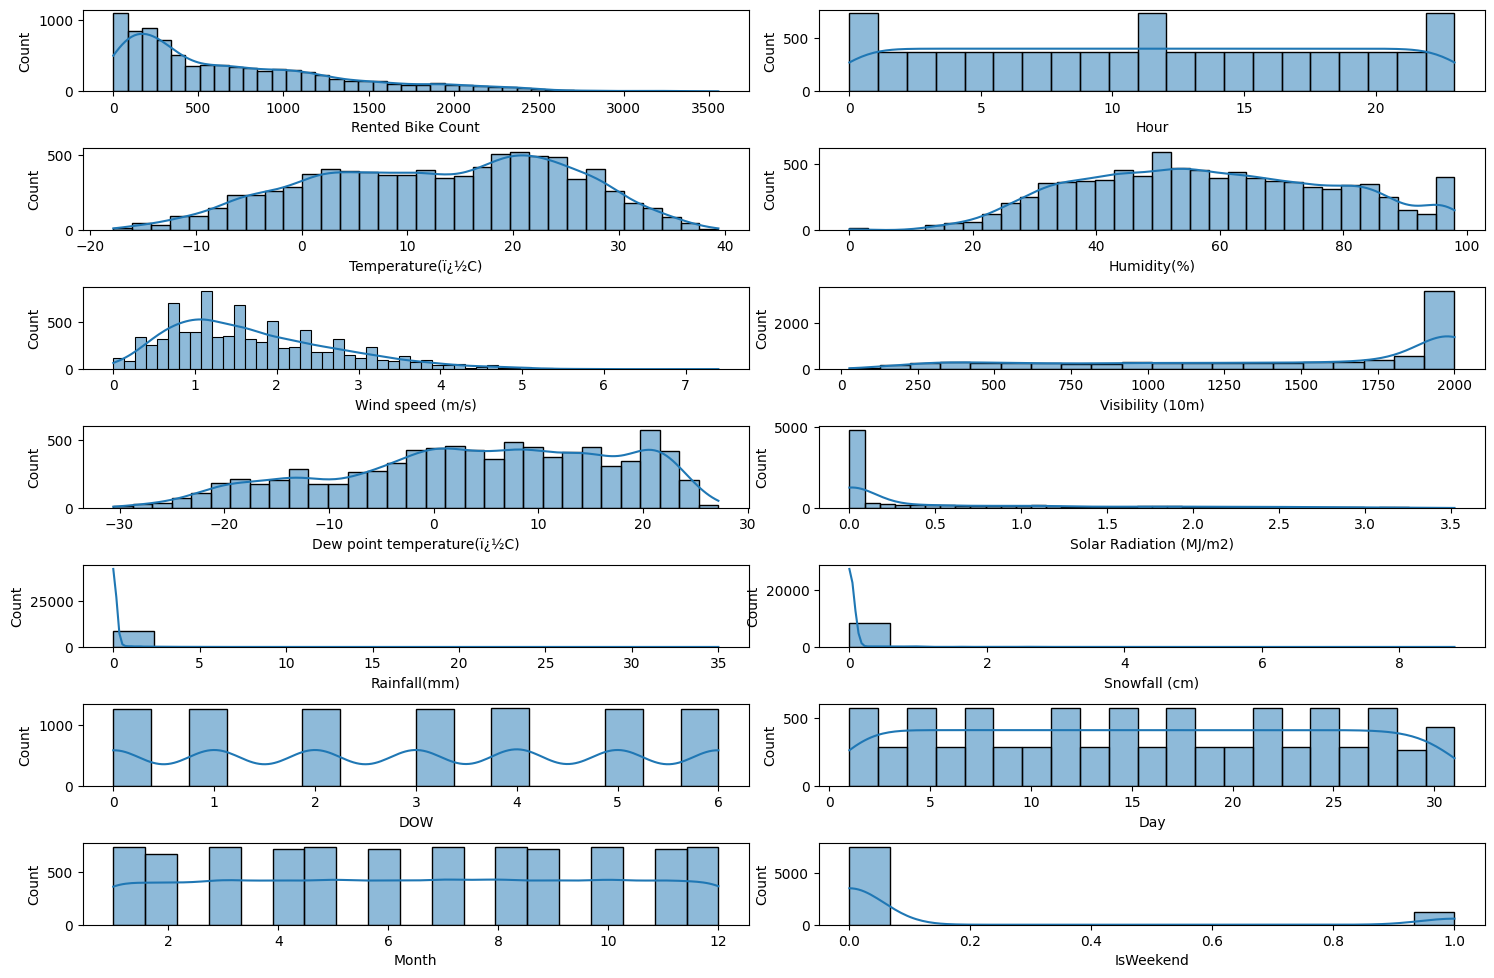

In [9]:
num_cols = 2
num_rows = int(len(corr.columns) / 2)
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15, 10))
axs = axs.flatten()

plt.tight_layout(pad=2)

for index, column_name in enumerate(corr.columns):
    # print(f"index: {index}, column name: {column_name}")
    sns.histplot(data=df, x=column_name, ax=axs[index], kde=True)

In [10]:
# cat_columns = df.select_dtypes(include=["object", "category"])
# cols = df[['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day']].groupby('Rented Bike Count').plot()



# df.boxplot(column=['Seasons', 'Holiday', 'Functioning Day'])